In [1]:
import pandas as pd
import keyring
import os
import requests
import json
import matplotlib.pyplot as plt

In [2]:
ipstack_key = keyring.get_password("webapi", "ipstack")
#ipstack_key

In [23]:
banlist_2021_09_11 = """
185.222.238.36 139.99.88.242 122.192.87.150 111.231.75.83 117.80.224.192 67.211.219.81 84.10.31.202 120.92.133.80 115.186.130.3 1.119.144.186 111.67.201.48 92.222.216.235 49.234.150.187 49.234.58.18 128.199.78.229 221.181.185.159 81.70.197.95 84.242.124.74 1.15.187.107 36.22.187.34 121.4.220.170 186.183.165.85 101.226.21.105 49.232.109.204 1.15.133.216 222.187.254.38 221.181.185.198 221.181.185.151 222.187.232.60 221.181.185.19 222.186.42.213 124.152.213.64 221.181.185.94 176.111.173.156 112.197.34.41 148.70.29.243 218.94.57.157 36.152.142.45 51.38.47.78 61.132.52.45 221.6.32.34 158.69.123.104 61.132.52.29 72.42.162.79 119.91.108.131 126.113.24.98 119.6.253.53 118.91.190.40 54.36.176.154 132.232.1.155 81.69.220.13 206.189.64.176 81.68.136.135 180.101.248.148 45.93.201.148 61.108.209.106 181.209.159.166 195.29.51.137 68.183.145.59 213.152.102.45 119.28.75.244 104.225.147.212 89.19.176.46 222.187.254.41 184.22.122.93 200.195.169.59 141.95.5.226 78.31.91.98 157.245.216.88 1.56.207.130 180.76.143.216 153.127.56.7 106.13.19.118 189.8.68.56 200.116.110.25 82.64.46.144 165.169.241.28 49.234.134.53 51.68.71.184 1.179.157.230 51.159.67.81 177.202.61.70 51.158.124.238 118.26.65.250 157.230.153.75 61.138.100.126 186.4.136.153 178.62.2.24 101.89.189.53 119.92.70.82 123.131.165.105 106.52.187.68 180.102.133.99 125.76.228.194 192.210.206.219 152.32.212.72 79.10.81.238 45.173.28.1 49.234.109.61 116.153.2.143 20.52.60.16 1.116.214.14 179.43.176.31 186.182.55.9 192.241.182.13 120.48.14.240 14.23.44.10 112.160.220.233 160.153.251.21 179.27.60.34 91.168.132.219 221.181.185.223 221.131.165.56 162.243.193.216 188.6.161.77 138.68.22.80 115.227.129.87 177.136.39.254 222.187.227.122 111.20.10.5 157.230.144.155 174.137.62.137 218.4.234.74 177.53.68.102 187.189.125.31 160.16.58.173 178.62.80.236 106.13.18.86 113.31.119.233 202.88.150.77 20.52.60.217 187.130.240.237 93.108.233.162 165.232.105.80 82.99.229.34 125.20.32.22 81.68.67.173 222.128.45.5 36.99.40.139 77.52.12.151 81.69.242.220 148.72.65.173 58.246.125.198 36.91.38.31 163.172.121.98 223.255.28.203 186.103.239.190 37.130.113.56 196.1.114.22 119.28.77.175 118.24.119.36 113.168.165.26 46.101.123.135 115.159.92.44 161.117.226.71 121.4.142.38 153.127.70.188 167.71.170.179 122.51.248.76 43.129.233.101 72.136.140.167 194.152.214.252 111.230.203.4 190.185.232.180 157.230.12.188 42.192.48.55 211.253.133.48 187.106.203.217 81.68.255.197 104.236.21.175 167.99.1.123 42.192.170.39 62.171.190.84 99.229.36.82 180.76.124.53 187.136.108.229 142.93.245.183 106.75.138.11 123.129.65.246 50.115.174.103 45.155.204.39 60.250.164.169 106.248.228.114 114.254.3.157 116.228.196.210 81.68.217.130 81.70.160.145 181.199.122.86 39.129.9.180 95.53.254.6 46.242.131.56 178.22.121.146 198.23.148.137 113.81.197.123 112.198.43.130 116.227.223.114 187.73.241.162 114.84.211.191 45.134.171.77 14.139.186.168 159.89.115.75 203.119.114.221 183.6.114.214 201.99.120.13 183.62.69.211 49.233.105.223 81.69.253.29 187.72.177.131 218.25.130.220 198.46.152.121 213.158.29.179 185.116.97.203 148.70.110.75 107.170.153.57 148.235.82.68 121.5.226.94 177.92.16.186 103.44.20.100 51.15.7.16 150.158.192.143 103.18.247.176 106.75.57.20 160.153.234.236 5.206.224.123 190.15.222.52 60.249.82.121 111.229.116.169 107.189.3.220 106.75.10.157 134.17.16.134 121.4.89.155 218.29.196.186 88.247.78.116 152.136.102.64 103.145.62.177 23.102.67.201 114.67.179.239 42.192.220.183 142.93.172.70 142.93.252.60 61.102.42.5 200.196.230.126 117.197.142.169 116.90.1.141 91.121.11.44 121.5.243.95 121.166.245.200 114.67.219.159 149.129.237.83 152.136.25.133 40.115.187.98 115.159.120.142 34.121.241.35 82.156.57.208 194.170.156.9 159.203.68.197 2.236.108.242 188.166.11.150 197.3.6.178 177.189.244.193 116.246.20.2 103.122.5.194 5.196.73.76 49.232.221.244 60.30.111.18 139.198.179.46 77.37.248.144 81.68.138.6 190.210.182.179 159.65.91.105 194.163.137.85 211.234.119.189 36.133.45.135 103.45.141.154 1.117.157.160 49.234.93.52 165.227.176.221 206.189.97.12 153.37.214.220 91.144.135.82 34.75.43.102 117.114.138.246 58.22.61.212 106.52.114.92 106.13.74.61 115.159.67.187 1.15.86.33 51.15.229.198 186.215.206.155 189.139.28.162 203.245.41.96 119.29.183.138 208.109.13.144 119.84.122.107 107.175.33.240 122.154.72.102 182.162.88.9 49.232.106.184 46.101.138.138 160.16.151.108 121.4.47.236 189.4.128.122 170.106.151.247 185.207.232.232 81.16.122.128 81.68.126.192 188.166.115.126 153.126.212.95 115.159.63.123 114.67.103.210 124.133.52.153 187.149.68.191 120.48.16.217 110.10.176.41 190.24.6.162 23.31.122.1 221.224.251.178 106.13.105.95 200.69.141.210 146.247.178.98 164.90.134.223 152.136.176.36 117.50.29.136 104.37.187.106 157.230.100.192 81.71.28.229 181.48.134.66 112.166.133.216 107.189.6.236 1.237.57.21 58.220.10.210 202.4.42.154 23.25.61.202 5.61.246.184 49.234.91.217 81.69.255.211 118.89.82.212 106.75.129.214 118.34.12.117 134.122.90.115 128.199.162.108 180.76.232.66 180.76.56.138 51.105.5.16 200.53.221.98 106.75.110.207 36.133.170.229 115.159.93.156 61.7.240.182 121.4.49.146 81.69.12.243 81.68.163.129 129.226.226.39 190.202.147.253 180.76.141.204 164.90.155.117 64.89.119.126 35.199.93.228 175.24.103.72 81.68.232.133 42.192.186.106 1.15.234.171 180.76.37.181 118.27.11.126 121.4.58.192 106.12.201.246 112.175.92.198 36.37.122.43 62.33.191.134 84.180.235.36 181.188.186.158 191.253.32.69 93.186.198.72 81.70.164.173 112.196.85.235 5.200.52.109 182.72.54.146 45.120.69.219 24.172.3.62 187.189.170.122 192.241.172.175 107.170.131.23 119.28.118.4 217.93.165.120 122.51.101.136 163.172.177.22 84.82.130.211 37.139.9.20 82.65.173.65 45.62.240.116 201.217.195.226 117.173.153.34 121.120.80.170 194.152.206.17 121.196.44.230 190.129.69.101 119.98.190.49 142.93.179.2 58.57.15.29 178.128.212.164 131.72.69.106 49.232.12.118 89.232.192.40 188.156.240.233 191.250.25.106 199.195.253.222 153.254.110.120 45.114.192.154 129.211.184.78 23.97.240.235 1.55.165.141 168.90.89.35 104.248.116.140 120.48.5.252 37.252.190.224 191.100.24.29 40.125.214.159 218.75.105.130 111.93.145.146 129.204.46.170 203.88.48.251 89.17.63.85 107.189.14.193 124.160.96.242 60.171.208.199 165.227.124.99 139.199.1.166 120.52.93.191 139.155.233.92 119.45.227.47 82.200.65.218 212.64.66.208 42.194.146.74 58.240.78.202 223.26.135.8 157.230.220.159 165.98.224.34 134.175.59.225 36.89.68.38 165.232.65.66 172.81.254.82 179.124.36.195 49.234.25.101 49.234.131.75 175.6.35.166 1.179.185.50 118.89.191.90 128.199.247.40 93.42.117.137 36.103.222.96 111.231.223.88 177.152.55.30 82.156.67.62 222.112.186.86 185.38.3.138 51.38.70.159 190.52.128.8 58.246.71.26 111.229.26.25 95.210.130.95 81.68.92.105 178.128.115.171 61.219.171.213 121.5.165.187 122.51.64.150 104.245.44.233 134.122.53.64 211.253.26.117 69.194.8.237
"""
banlist = sorted([x.strip() for x in banlist_2021_09_11.split(' ')])
len(banlist)

469

In [24]:
#req = requests.get(f"http://api.ipstack.com/2601:642:4300:34f:28d5:5193:ad27:c2e7?access_key={ipstack_key}")

In [25]:
#req.status_code

In [26]:
#json.loads(req.text)

In [27]:
def ipinfo(ip):
    global ipstack_key
    req = requests.get(f"http://api.ipstack.com/{ip}?access_key={ipstack_key}")
    data = None
    if req.status_code == 200:
        data = json.loads(req.text)
    return data

In [28]:
datfile = "attack-ipinfos.dat"
if os.path.isfile(datfile):
    with open(datfile, "rt") as f:
        infos = json.load(f)
else:
    infos = {}
for ip in banlist:
    if not ip in infos:
        print(f"fetch {ip}")
        infos[ip] = ipinfo(ip)
with open(datfile, "wt") as f:
    json.dump(infos, f)

fetch 1.179.185.50
fetch 1.55.165.141
fetch 104.245.44.233
fetch 104.248.116.140
fetch 107.189.14.193
fetch 111.229.26.25
fetch 111.231.223.88
fetch 111.93.145.146
fetch 118.89.191.90
fetch 119.45.227.47
fetch 120.48.5.252
fetch 120.52.93.191
fetch 121.5.165.187
fetch 122.51.64.150
fetch 124.160.96.242
fetch 128.199.247.40
fetch 129.204.46.170
fetch 129.211.184.78
fetch 134.122.53.64
fetch 134.175.59.225
fetch 139.155.233.92
fetch 139.199.1.166
fetch 153.254.110.120
fetch 157.230.220.159
fetch 165.227.124.99
fetch 165.232.65.66
fetch 165.98.224.34
fetch 168.90.89.35
fetch 172.81.254.82
fetch 175.6.35.166
fetch 177.152.55.30
fetch 178.128.115.171
fetch 179.124.36.195
fetch 185.38.3.138
fetch 190.52.128.8
fetch 191.100.24.29
fetch 199.195.253.222
fetch 203.88.48.251
fetch 211.253.26.117
fetch 212.64.66.208
fetch 218.75.105.130
fetch 222.112.186.86
fetch 223.26.135.8
fetch 23.97.240.235
fetch 36.103.222.96
fetch 36.89.68.38
fetch 37.252.190.224
fetch 40.125.214.159
fetch 42.194.146.74
fet

In [29]:
data = []
cols = ['ip', 'continent_code', 'country_code', 'city', 'latitude', 'longitude']
for k in infos:
    v = infos[k]
    data.append([v[col] for col in cols])
df = pd.DataFrame(columns=cols, data=data)

In [30]:
df = df.sort_values(['continent_code', 'country_code', 'city', 'ip'])
df

,ip,continent_code,country_code,city,latitude,longitude
38,165.169.241.28,AF,RE,Le Port,-20.938330,55.304722
203,197.3.6.178,AF,TN,Tunis,36.798000,10.171700
201,194.170.156.9,AS,AE,Abu Dhabi,24.470280,54.372780
98,1.116.214.14,AS,CN,Beijing,39.911758,116.379227
269,1.117.157.160,AS,CN,Beijing,39.911758,116.379227
...,...,...,...,...,...,...
182,181.199.122.86,SA,EC,Guayaquil,-2.195000,-79.900002
49,186.4.136.153,SA,EC,Quito,-0.223200,-78.512703
439,190.52.128.8,SA,PY,Asunción,-25.282200,-57.635101
179,179.27.60.34,SA,UY,Montevideo,-34.883999,-56.162998


In [31]:
len(df)

469

In [32]:
df[df.continent_code=='NA']

,ip,continent_code,country_code,city,latitude,longitude
37,158.69.123.104,NA,CA,Montréal,45.502079,-73.562012
251,72.136.140.167,NA,CA,Tillsonburg,42.879971,-80.752533
162,159.89.115.75,NA,CA,Toronto,43.703171,-79.512192
268,99.229.36.82,NA,CA,Toronto,43.703171,-79.512192
381,45.62.240.116,NA,CA,Waterloo,43.461342,-80.507004
...,...,...,...,...,...,...
164,160.153.251.21,NA,US,Scottsdale,33.610958,-111.890106
304,208.109.13.144,NA,US,Scottsdale,33.610958,-111.890106
243,50.115.174.103,NA,US,Seattle,47.601501,-122.330399
320,104.37.187.106,NA,US,Secaucus,40.778259,-74.064529


In [33]:
myloc = { "latitude": [37.62757873535156], "longitude": [-122.05397033691406] }

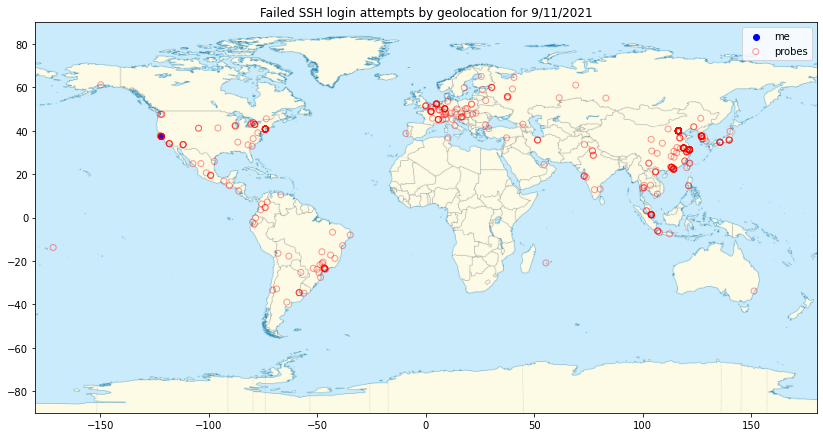

In [34]:
plt.figure(figsize=[14,10])
im = plt.imread('./World_location_map_(equirectangular_180).png')
plt.imshow(im, zorder=0, extent=[-180,180,-90,90])
plt.scatter(myloc['longitude'], myloc['latitude'], c='b', label="me")
plt.scatter(df['longitude'], df['latitude'], alpha=0.4, edgecolors='r', facecolors='none', label="probes")
plt.title("Failed SSH login attempts by geolocation for 9/11/2021")
plt.legend()